In [262]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVR


# Loading Built-In Set

**Question 1**

- Loading `diabetes` dataset

In [263]:
diabetes: np.ndarray = load_diabetes()

**Question 2**

- Splitting data into training set and test set

In [264]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=1206)

**Question 3**

- Computing $R^2$ for the `Lasso` model using default parameters

In [265]:
lasso: Lasso = Lasso().fit(X_train, y_train)

In [266]:
print(f"Training set score: {lasso.score(X_train, y_train)}")
print(f"Test set score: {lasso.score(X_test, y_test)}")

Training set score: 0.38147281844853587
Test set score: 0.3092790709781681


- Printing the number of features used in the model

In [267]:
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Number of features used: 3


- Printing names of the features used

In [268]:
print(f"Features used: {diabetes.feature_names}")

Features used: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [269]:
del X_train, X_test, y_train, y_test

# Loading Diabetes from File

**Question 4**

- Importing data from file 
- Each sample is separated by `	` hence it is set as the `delimiter`
- The header (first row) is skipped as it is not data

In [270]:
diabetes = np.genfromtxt('diabetes.data', delimiter='	', skip_header=1)

- Separating features `X` and labels `y`

In [271]:
X: np.ndarray = diabetes[:, :-1]
y: np.ndarray = diabetes[:, -1]

In [272]:
print("Whole Data: ", diabetes[0])
print("X: ", X[0])
print("y: ", y[0])

Whole Data:  [ 59.       2.      32.1    101.     157.      93.2     38.       4.
   4.8598  87.     151.    ]
X:  [ 59.       2.      32.1    101.     157.      93.2     38.       4.
   4.8598  87.    ]
y:  151.0


**Question 5**

- Splitting data into training sets and test sets

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1206)

**Question 6**

- Computing $R^2$ for the `Lasso` model using default parameters

In [274]:
lasso: Lasso = Lasso().fit(X_train, y_train)

In [275]:
print(f"Training set score: {lasso.score(X_train, y_train)}")
print(f"Test set score: {lasso.score(X_test, y_test)}")

Training set score: 0.5322897171515191
Test set score: 0.42628496708856434


- Printing the number of features used

In [276]:
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Number of features used: 9


- Printing names of features used
  - Loading the header from `diabetes.data` (as it was excluded)

In [277]:
header: np.ndarray = np.genfromtxt('diabetes.data', delimiter='	', max_rows=1, dtype=str)
print(header)

['AGE' 'SEX' 'BMI' 'BP' 'S1' 'S2' 'S3' 'S4' 'S5' 'S6' 'Y']


## StandardScalar

**Question 7**

- Preprocessing data using `StandardScalar`

In [278]:
scaler: StandardScaler = StandardScaler()

X_train_scaled: StandardScaler = scaler.fit(X_train)
X_test_scaled: StandardScaler = scaler.fit(X_test)

X_train_scaled: StandardScaler = scaler.transform(X_train)
X_test_scaled: StandardScaler = scaler.transform(X_test)

**Question 8**

- Computing $R^2$ for the `Lasso` model using default parameters

In [279]:
lasso = Lasso().fit(X_train_scaled, y_train)

In [280]:
print(f"Training set score: {lasso.score(X_train_scaled, y_train)}")
print(f"Test set score: {lasso.score(X_test_scaled, y_test)}")

Training set score: 0.5337742073290201
Test set score: 0.4315961656558963


- Printing the number of features used in the model

In [281]:
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Number of features used: 8


- Printing names of features used

In [282]:
print(f"Features used: {header[:-1]}")

Features used: ['AGE' 'SEX' 'BMI' 'BP' 'S1' 'S2' 'S3' 'S4' 'S5' 'S6']


## Plotting

In [283]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train_scaled, y_train)
print(f"Training set score: {lasso001.score(X_train_scaled, y_train)}")
print(f"Test set score: {lasso001.score(X_test_scaled, y_test)}")
print(f"Number of features used: {np.sum(lasso001.coef_ != 0)}")

Training set score: 0.5394187103851991
Test set score: 0.4357485463667913
Number of features used: 10


In [284]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train_scaled, y_train)
print(f"Training set score: {lasso00001.score(X_train_scaled, y_train)}")
print(f"Test set score: {lasso00001.score(X_test_scaled, y_test)}")
print(f"Number of features used: {np.sum(lasso00001.coef_ != 0)}")

Training set score: 0.5394260835459506
Test set score: 0.4355856643574041
Number of features used: 10


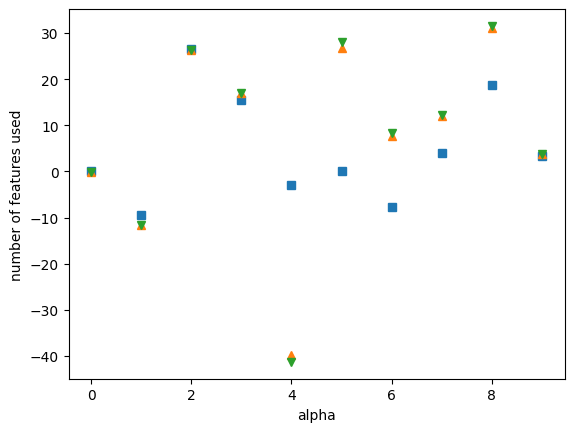

In [285]:
# Varying the regularization parameter α in the Lasso, plot the test R2 vs the number of features used (non-zero coefficients) for α = 0.01, 0.1, 1, 10. What do you observe?
# plot
import matplotlib.pyplot as plt
plt.xlabel("alpha")
plt.ylabel("number of features used")
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")


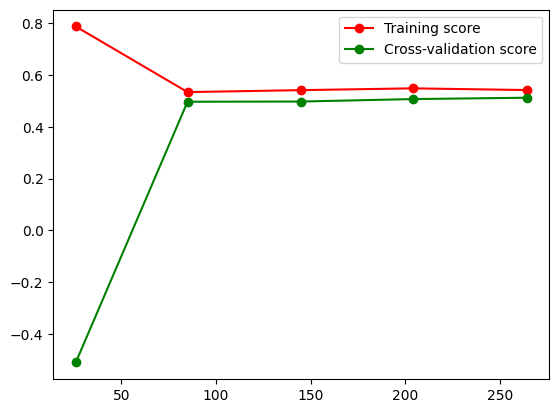

In [286]:
# plot learning curve for Lasso with alpha=0.01, 0.1, 1, 10
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(Lasso(alpha=0.01, max_iter=100000), X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")


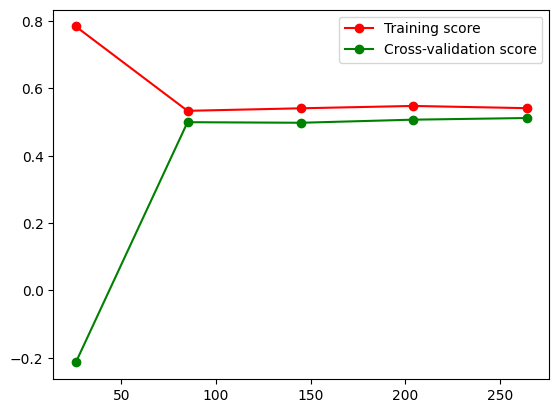

In [287]:
train_sizes, train_scores, test_scores = learning_curve(Lasso(alpha=0.1, max_iter=100000), X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")

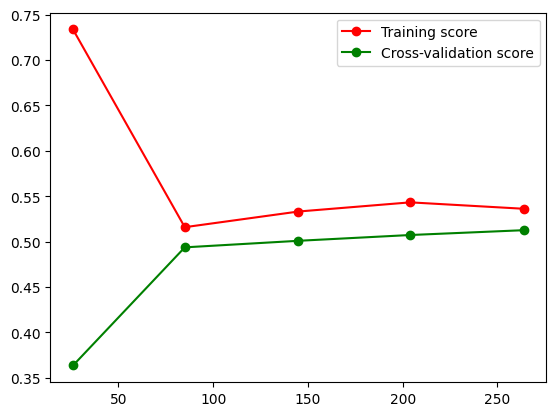

In [288]:
train_sizes, train_scores, test_scores = learning_curve(Lasso(alpha=1, max_iter=100000), X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")

**Question 10**

### Grid Search

In [289]:
param_grid: dict[str, int] = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
grid: GridSearchCV = GridSearchCV(Lasso(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print(f"Best cross-validation score: {grid.best_score_}")
print(f"Best parameters: {grid.best_params_}")

print(f"Training set score: {grid.score(X_train_scaled, y_train)}")
print(f"Test set score: {grid.score(X_test_scaled, y_test)}")

print(f"Number of features used: {np.sum(grid.best_estimator_.coef_ != 0)}")

Best cross-validation score: 0.5130276864730194
Best parameters: {'alpha': 1}
Training set score: 0.5337742073290201
Test set score: 0.4315961656558963
Number of features used: 8


### Lasso

In [290]:
best_score: float = 0
for gamma in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:
	lasso = Lasso(alpha=gamma, max_iter=100000).fit(X_train_scaled, y_train)
	score = lasso.score(X_test_scaled, y_test)
	if score > best_score:
		best_score = score
		best_parameters = {'alpha': gamma}

lasso = Lasso(**best_parameters).fit(X_train_scaled, y_train)
print(f"Training set score: {lasso.score(X_train_scaled, y_train)}")
print(f"Test set score: {lasso.score(X_test_scaled, y_test)}")

print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Training set score: 0.5386930162142083
Test set score: 0.4367551192131277
Number of features used: 9


### Support Vector Regression

In [291]:
best_score: float = 0
for gamma in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:
	for C in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:
		svr = SVR(gamma=gamma, C=C).fit(X_train_scaled, y_train)
		score = svr.score(X_test_scaled, y_test)
		if score > best_score:
			best_score = score
			best_parameters = {'C': C, 'gamma': gamma}

svr = SVR(**best_parameters).fit(X_train_scaled, y_train)
print(f"Training set score: {svr.score(X_train_scaled, y_train)}")
print(f"Test set score: {svr.score(X_test_scaled, y_test)}")

Training set score: 0.5605745648309347
Test set score: 0.4402521028312093


### Support Vector Correlation

In [292]:
from sklearn.svm import SVR, SVC

best_score: float = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]: # try different values for gamma
	for C in [0.001, 0.01, 0.1, 1, 10, 100]: # try different values for C
		svm: SVC = SVC(gamma=gamma, C=C) # build the model
		svm.fit(X_train, y_train) # train the model
		score: float = svm.score(X_test, y_test) # evaluate the model on the test set
		if score > best_score: # if we got a better score, store the score and parameters
			best_score = score # store the best score
			best_parameters = {'C': C, 'gamma': gamma} # store the best parameters

svm: SVC = SVC(**best_parameters) # build the model with the best parameters
svm.fit(X_train, y_train) # train the model
print(f"Training set score: {svm.score(X_train, y_train)}") # evaluate the model on the training set
print(f"Test set score: {svm.score(X_test, y_test)}") # evaluate the model on the test set

Training set score: 1.0
Test set score: 0.018018018018018018


### Ridge Regression

In [293]:
from sklearn.linear_model import Ridge

best_score: float = 0
for alpha in [0.001, 0.01, 0.1, 1, 10, 100]: # try different values for alpha
	ridge: Ridge = Ridge(alpha=alpha) # build the model
	ridge.fit(X_train, y_train) # train the model
	score: float = ridge.score(X_test, y_test) # evaluate the model on the test set
	if score > best_score: # if we got a better score, store the score and parameters
		best_score = score # store the best score
		best_parameters = {'alpha': alpha} # store the best parameters

ridge: Ridge = Ridge(**best_parameters) # build the model with the best parameters
ridge.fit(X_train, y_train) # train the model
print(f"Training set score: {ridge.score(X_train, y_train)}") # evaluate the model on the training set
print(f"Test set score: {ridge.score(X_test, y_test)}") # evaluate the model on the test set

Training set score: 0.5394260840483416
Test set score: 0.4355826857407178


### Comparison

- Comparing accuracy between several regression models
  - Grid Search
  - Lasso
  - Support Vector Regression
  - Ridge Regression
- The accuracy between all the models seems to be consistent

Text(0, 0.5, 'Accuracy')

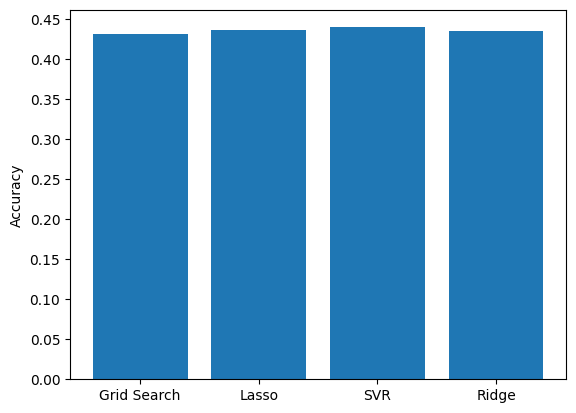

In [300]:
plt.bar(['Grid Search', 'Lasso', 'SVR', 'Ridge'], [grid.score(X_test_scaled, y_test), lasso.score(X_test_scaled, y_test), svr.score(X_test_scaled, y_test), ridge.score(X_test, y_test)])
plt.yticks(np.arange(0, 0.5, 0.05))
plt.ylabel('Accuracy')

**Question 11**

*Part A*

- Splitting the data into training set and test set again (just in case)
  - As the variables may have been tempered with
- Splitting the training set into training set and validation set
  - Similar to splitting data into test and training sets
  - `test_size` in this case validation size is 99

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1206) # split the data into training and test sets
X_train_pr, X_val, y_train_pr, y_val = train_test_split(X_train, y_train, test_size=99, random_state=1206) # split the training set into training and validation sets

In [ ]:
print(f"X_val.shape: {X_val.shape}, y_val.shape: {y_val.shape}") # print the shapes of the validation set

X_val.shape: (99, 10), y_val.shape: (99,)


*Part B*

In [ ]:
scalar: StandardScaler = StandardScaler()

X_train_pr_scaled: np.ndarray = scalar.fit(X_train_pr)
X_train_pr_scaled: np.ndarray = scalar.transform(X_train_pr)
X_val_scaled: np.ndarray = scalar.transform(X_val)
X_val_scaled: np.ndarray = scalar.transform(X_val)

*Part C*

In [ ]:
# Using the nonconformity measure α = |y − ŷ|, where y is the true label and ŷ is its prediction given the training set proper, for each test sample compute the prediction interval for it. Do this for significance levels 5% and 20%.

